In [43]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

Load the text extraction data (assuming multiple cluster files) and the video engagement data.

In [44]:
# Specify the folder containing the cluster files
cluster_folder = 'text_clusters'  # Replace with the actual folder path

# List all CSV files in the folder
cluster_files = [os.path.join(cluster_folder, f) for f in os.listdir(cluster_folder) if f.endswith('.csv')]

# Print the list of files to verify
print("Cluster Files Found:")
print(cluster_files)

Cluster Files Found:
['text_clusters\\df_cluster_0.csv', 'text_clusters\\df_cluster_1.csv', 'text_clusters\\df_cluster_2.csv', 'text_clusters\\df_cluster_3.csv', 'text_clusters\\df_cluster_4.csv', 'text_clusters\\df_cluster_5.csv']


In [45]:
# Combine all cluster data into one DataFrame
text_data = pd.concat([pd.read_csv(file) for file in cluster_files], ignore_index=True)

# Load video engagement data
video_data = pd.read_csv('results_count_with_error.csv')

In [46]:
# Display the first few rows of both datasets
print("\nText Extraction Data:")
print(text_data.head())
print("\nNumber of rows and columns in text_data:", text_data.shape)

print("\nVideo Engagement Data:")
print(video_data.head())
print("\nNumber of rows and columns in video_data:", video_data.shape)


Text Extraction Data:
      Video ID                               text_cleaned  cluster  \
0  TeMYei9-L3I                     HOW TO DRINK RED HORSE        0   
1  7YUatj_Uq6c           TOP 10 PLACES TO SEE PHILIPPINES        0   
2  Q7teS12VJfg                              ANGELICA HALE        0   
3  QG61j-coCgM  THE MIRACLE OF T16 ICONIC ESPORTS MOMENTS        0   
4  z9K8LE9lgqA                DAY 1 HEL DAY 2 THE PEOPLE.        0   

   x0_Bert-CLS  x1_Bert-CLS  
0     2.089855    -1.174470  
1     1.764231    -1.594547  
2     1.416814    -1.715946  
3     1.863088    -2.554374  
4     1.518131    -0.203527  

Number of rows and columns in text_data: (2938, 5)

Video Engagement Data:
      Video ID  View Count  Like Count  Comment Count
0  lZXDClzL8m8     4885860       75940           3507
1  XsWKvutlu8I     3545247       55237           1656
2  stMSVi5wI8k     3824080       67281           2274
3  b7HQU_--Qdw      596295       10123            831
4  zDwuJgLNJbc     4322068    

In [47]:
# Merge datasets on 'Video ID'
merged_data = pd.merge(text_data, video_data, on='Video ID', how='inner')

# Check the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

# Display the number of rows and columns
print("\nNumber of rows and columns:", merged_data.shape)


Merged Dataset:
      Video ID                               text_cleaned  cluster  \
0  TeMYei9-L3I                     HOW TO DRINK RED HORSE        0   
1  7YUatj_Uq6c           TOP 10 PLACES TO SEE PHILIPPINES        0   
2  Q7teS12VJfg                              ANGELICA HALE        0   
3  QG61j-coCgM  THE MIRACLE OF T16 ICONIC ESPORTS MOMENTS        0   
4  z9K8LE9lgqA                DAY 1 HEL DAY 2 THE PEOPLE.        0   

   x0_Bert-CLS  x1_Bert-CLS  View Count  Like Count  Comment Count  
0     2.089855    -1.174470        3864         296             95  
1     1.764231    -1.594547       27166        1415             43  
2     1.416814    -1.715946       16090         613             58  
3     1.863088    -2.554374     1825759       16723           1736  
4     1.518131    -0.203527       13262         489             52  

Number of rows and columns: (2440, 8)


In [48]:
# Group by cluster and calculate total and average engagement metrics
cluster_summary = merged_data.groupby('cluster').agg(
    Total_Views=('View Count', 'sum'),
    Avg_Views=('View Count', 'mean'),
    Total_Likes=('Like Count', 'sum'),
    Avg_Likes=('Like Count', 'mean'),
    Total_Comments=('Comment Count', 'sum'),
    Avg_Comments=('Comment Count', 'mean')
).reset_index()

# Display the summary
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   cluster  Total_Views     Avg_Views  Total_Likes    Avg_Likes  \
0        0    229628931  3.005614e+05      5854608  7663.099476   
1        1     65872706  1.441416e+05      1969263  4309.109409   
2        2     43198709  1.380150e+05      1169457  3736.284345   
3        3    470869428  1.401397e+06      2955638  8796.541667   
4        4     16310115  1.019382e+05       393989  2462.431250   
5        5     75456219  1.840396e+05      1542189  3761.436585   

   Total_Comments  Avg_Comments  
0          302856    396.408377  
1          205541    449.761488  
2           88158    281.654952  
3          172010    511.934524  
4           33976    212.350000  
5          128444    313.278049  


## Pearson R Correlation

In [ ]:
# Correlation analysis
correlation_data = merged_data[['x0_Bert-CLS', 'x1_Bert-CLS', 'View Count', 'Like Count', 'Comment Count']]
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Text Features vs Engagement Metrics')
plt.show()

In [ ]:
# Group the data by 'cluster'
grouped = merged_data.groupby('cluster')

# Iterate through each cluster and compute the correlation matrix
for cluster, group_data in grouped:
    print(f"\nCluster {cluster} Correlation Matrix:")
    
    # Select relevant columns for correlation analysis
    correlation_data = group_data[['x0_Bert-CLS', 'x1_Bert-CLS', 'View Count', 'Like Count', 'Comment Count']]
    
    # Compute the correlation matrix
    correlation_matrix = correlation_data.corr()
    print(correlation_matrix)
    
    # Visualize the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for Cluster {cluster}')
    plt.show()

In [ ]:
# Top clusters by total views
top_clusters_by_views = cluster_summary.sort_values(by='Total_Views', ascending=False).head()
print("\nTop Clusters by Total Views:")
print(top_clusters_by_views)

In [ ]:
# Find top clusters by total likes
top_clusters_by_likes = cluster_summary.sort_values(by='Total_Likes', ascending=False).head()
print("\nTop Clusters by Total Likes:")
print(top_clusters_by_likes)

In [ ]:
# Find top clusters by total comments
top_clusters_by_comments = cluster_summary.sort_values(by='Total_Comments', ascending=False).head()
print("\nTop Clusters by Total Comments:")
print(top_clusters_by_comments)

In [ ]:
# Add a new column for the combined total of views, likes, and comments
cluster_summary['Combined_Total'] = (
    cluster_summary['Total_Views'] +
    cluster_summary['Total_Likes'] +
    cluster_summary['Total_Comments']
)

# Find top clusters by combined total
top_clusters_by_combined = cluster_summary.sort_values(by='Combined_Total', ascending=False).head()
print("\nTop Clusters by Combined Total (Views + Likes + Comments):")
print(top_clusters_by_combined)

## ANOVA Correlation

Group By Cluster

In [49]:
# Group data by 'cluster' and extract 'View Count' for each cluster
grouped_by_cluster = merged_data.groupby('cluster')['View Count'].apply(list)

# Convert to a list of arrays (one array per cluster)
view_counts_per_cluster = [np.array(group) for group in grouped_by_cluster]

View Count

In [50]:
# Perform ANOVA test on View Count
anova_result = f_oneway(*view_counts_per_cluster)

# Print results
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("There are statistically significant differences in View Count between clusters.")
else:
    print("No significant differences in View Count between clusters.")

ANOVA F-statistic: 6.634985281213245, p-value: 3.8133923099059404e-06
There are statistically significant differences in View Count between clusters.


C:\Users\yesha\AppData\Local\Temp\ipykernel_42432\597980715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='cluster', y='View Count', palette='Set2')


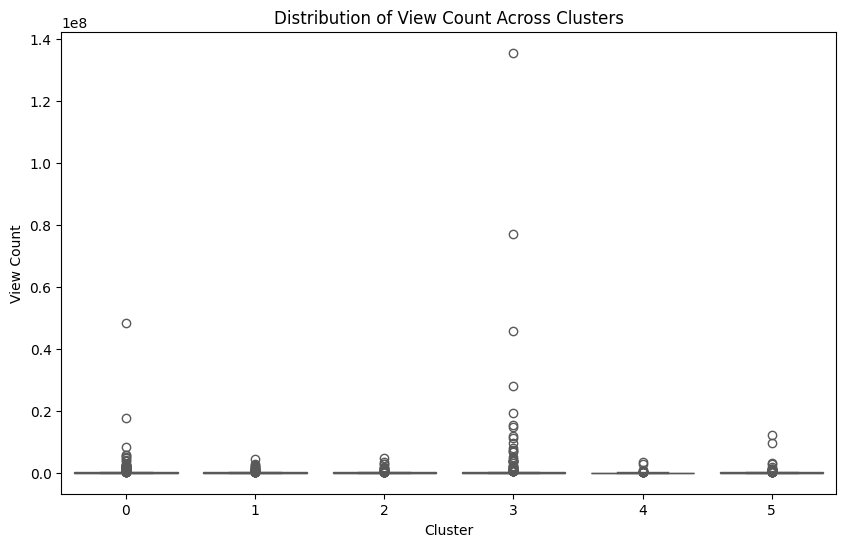

In [54]:
# Boxplot of View Count by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='cluster', y='View Count', palette='Set2')
plt.title('Distribution of View Count Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('View Count')
plt.show()

Violin Plot (Provides more detail about the distribution (e.g., whether the data is skewed or multimodal))

C:\Users\yesha\AppData\Local\Temp\ipykernel_42432\4172411182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_data, x='cluster', y='View Count', palette='Set2')


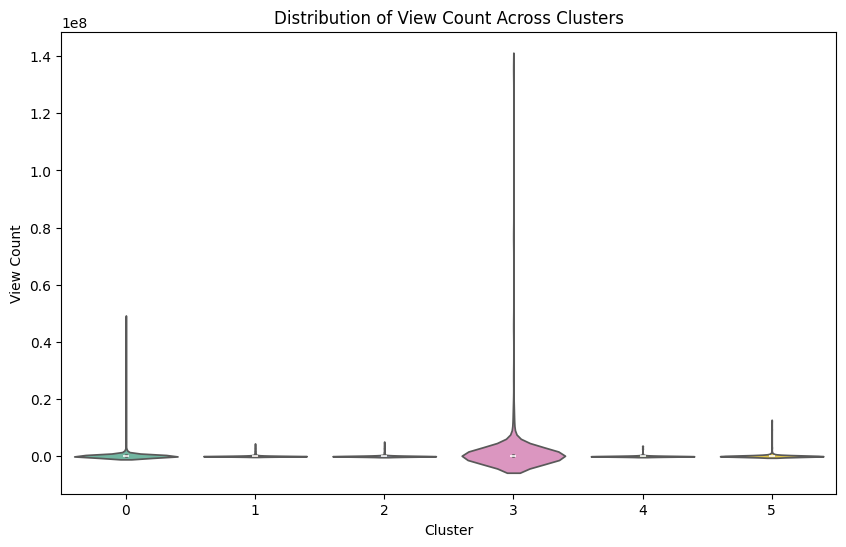

In [52]:
# Violin plot of View Count by cluster
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='cluster', y='View Count', palette='Set2')
plt.title('Distribution of View Count Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('View Count')
plt.show()

Check for Outliers

In [55]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = merged_data['View Count'].quantile(0.25)
Q3 = merged_data['View Count'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = merged_data[(merged_data['View Count'] < lower_bound) | (merged_data['View Count'] > upper_bound)]

# Display the outliers
print(outliers)

         Video ID                                       text_cleaned  cluster  \
3     QG61j-coCgM          THE MIRACLE OF T16 ICONIC ESPORTS MOMENTS        0   
5     k1ZKMHbV9Ik         APO WHANG-OD NEXT OF SKIN THE BEAUTY ISSUE        0   
13    TwBPMtCMMrs                                 MEET THE DELEGATES        0   
15    pIDzPmE6DEM                PAULINE AGUPITAN I BELIEVE REACTION        0   
20    0nSdV9DJwow  ON THE GROUND WITH U.S. FORCES IN THE PHILIPPINES        0   
...           ...                                                ...      ...   
2395  Zd4JZn8GkVY          MY COMPETITION MOMENTS With Catriona Gray        5   
2396  YCttXNa4Vtk                          POCHERO with PORK & BEANS        5   
2404  yvbZcVUqe9A             EUMEE CAPILE CHANDELIER REACTION PT. 1        5   
2409  zshuDOe5JYg                                        PHILIPPINES        5   
2411  8qCqpy2emLk                                            DREAMER        5   

      x0_Bert-CLS  x1_Bert-

Remove Outliers

In [56]:
# Remove outliers
filtered_data = merged_data[(merged_data['View Count'] >= lower_bound) & (merged_data['View Count'] <= upper_bound)]

# Display the new dataset without outliers
print(filtered_data)

         Video ID                      text_cleaned  cluster  x0_Bert-CLS  \
0     TeMYei9-L3I            HOW TO DRINK RED HORSE        0     2.089855   
1     7YUatj_Uq6c  TOP 10 PLACES TO SEE PHILIPPINES        0     1.764231   
2     Q7teS12VJfg                     ANGELICA HALE        0     1.416814   
4     z9K8LE9lgqA       DAY 1 HEL DAY 2 THE PEOPLE.        0     1.518131   
6     TaedpHFzjt0           SHE SLAYED BOTH ANTHEMS        0     2.028401   
...           ...                               ...      ...          ...   
2435  SU0ySG8UNsE                         ALJAZEERA        5     0.532671   
2436  gbXewl0ip0g              KILLED IT!! REACTION        5     1.684255   
2437  ODzuORF2fIc                         ALJAZEERA        5     0.532671   
2438  GPvGmO7WRZc                            STATUS        5     0.294892   
2439  DxfXxAfK3Sw                        HOMECOMING        5     1.022934   

      x1_Bert-CLS  View Count  Like Count  Comment Count  
0       -1.17447

Check again for Outliers

C:\Users\yesha\AppData\Local\Temp\ipykernel_42432\1603105470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='cluster', y='View Count', palette='Set2')


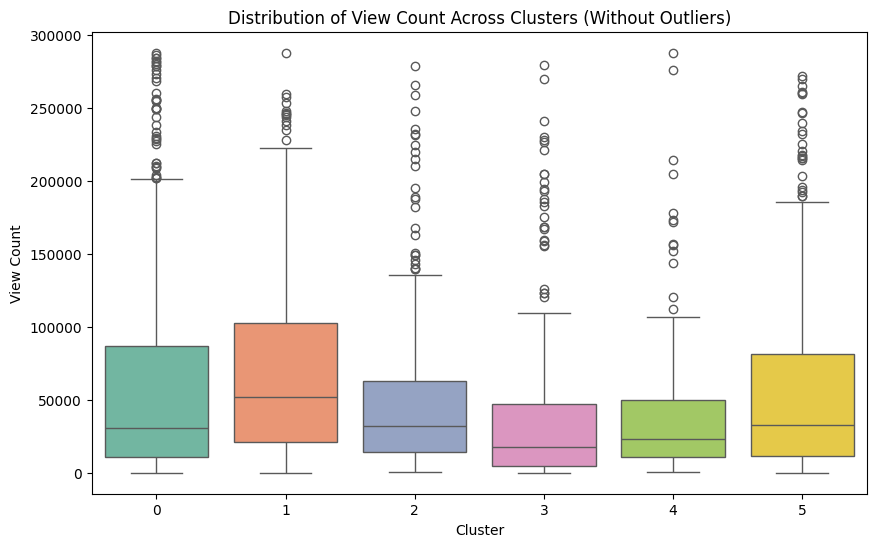

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='cluster', y='View Count', palette='Set2')
plt.title('Distribution of View Count Across Clusters (Without Outliers)')
plt.xlabel('Cluster')
plt.ylabel('View Count')
plt.show()

Cluster Like Count

In [ ]:
grouped_by_cluster_likes = merged_data.groupby('cluster')['Like Count'].apply(list)
likes_per_cluster = [np.array(group) for group in grouped_by_cluster_likes]

# Perform ANOVA test on Like Count
anova_likes_result = f_oneway(*likes_per_cluster)
print(f"ANOVA for Like Count - F-statistic: {anova_likes_result.statistic}, p-value: {anova_likes_result.pvalue}")

In [ ]:
# Boxplot of Like Count by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='cluster', y='Like Count', palette='Set2')
plt.title('Distribution of Like Count Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Like Count')
plt.show()

Cluster and Comment Count

In [ ]:
# Group data by 'cluster' and extract 'Comment Count' for each cluster
grouped_by_cluster_comments = merged_data.groupby('cluster')['Comment Count'].apply(list)
comments_per_cluster = [np.array(group) for group in grouped_by_cluster_comments]

# Perform ANOVA test on Comment Count
anova_comments_result = f_oneway(*comments_per_cluster)
print(f"ANOVA for Comment Count - F-statistic: {anova_comments_result.statistic}, p-value: {anova_comments_result.pvalue}")

In [ ]:
# Boxplot of Comment Count by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='cluster', y='Comment Count', palette='Set2')
plt.title('Distribution of Comment Count Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Comment Count')
plt.show()